# **Car Price Prediction**


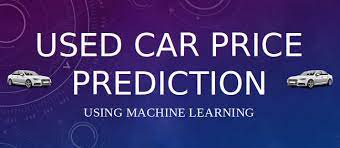

## **Notebook** - Goal
 #### 💡 The main aim of this Notebook is to predict the price of cars using various Machine Learning (ML) models.
  #### 💡 Examine Underlying Data Insights which enables the buyers to purchase the car based on some factors and from business point of view which variables are significant in predicting the price of a car and How well those variables describe the price of a car.

## **Data Source** : https://www.kaggle.com/datasets/harmeetsingh07/exshowroom-price
#### 💡This dataset contains the number of specifications in a new car like height-weight-length, suspension, body, fuel type, audio system, etc everything in a brand new car and then based on all those features it's ex-showroom price is given
#### 💡This Dataset contains Columns: 141 entries dtypes: float64(6), int64(1), object(134)


# **Notebook**- Content
### 💡Basic Understanding of Data.
### 💡Data Cleaning.
### 💡Expolatory Data Analysis (EDA).
### 💡Data Preprocessing.
### 💡Model Building.
### 💡Model Performacne Check.
### 💡Best Performing Model Selecions.
### 💡Hyper-Parameter Tunning.
### 💡Submitting Prediction.


## **Importing**- Libraries


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
🚀Importing Libraries
</p>
</div>

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
from scipy import stats as st
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings("ignore")


In [173]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

### **Loading**- Dataset

In [174]:
df=pd.read_csv("/kaggle/input/exshowroom-price/cars_engage_2022 (1).csv")


### **Take a first look at the Dataset**


In [175]:
df

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,City_Mileage,Highway_Mileage,ARAI_Certified_Mileage,ARAI_Certified_Mileage_for_CNG,Kerb_Weight,Gears,Ground_Clearance,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Track,Rear_Track,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seating_Capacity,Seats_Material,Type,Wheelbase,Wheels_Size,Start_/_Stop_Button,12v_Power_Outlet,Audiosystem,Aux-in_Compatibility,Average_Fuel_Consumption,Basic_Warranty,Bluetooth,Boot-lid_Opener,Boot_Space,CD_/_MP3_/_DVD_Player,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Distance_to_Empty,Door_Pockets,Engine_Malfunction_Light,Extended_Warranty,FM_Radio,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Minimum_Turning_Radius,Multifunction_Display,Sun_Visor,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,3_Point_Seat-Belt_in_Middle_Rear_Seat,Ambient_Lightning,Cargo/Boot_Lights,Drive_Modes,Engine_Immobilizer,High_Speed_Alert_System,Lane_Watch_Camera/_Side_Mirror_Camera,Passenger_Side_Seat-Belt_Reminder,Seat_Back_Pockets,Voice_Recognition,Walk_Away_Auto_Car_Lock,ABS_(Anti-lock_Braking_System),Headlight_Reminder,Adjustable_Headrests,Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,EBD_(Electronic_Brake-force_Distribution),Fasten_Seat_Belt_Warning,Gear_Shift_Reminder,Number_of_Airbags,Compression_Ratio,Adjustable_Steering_Column,Other_Specs,Other_specs,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Android_Auto,Apple_CarPlay,Cigarette_Lighter,Infotainment_Screen,Multifunction_Steering_Wheel,Average_Speed,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Tyre_Pressure_Monitoring_System,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Recommended_Tyre_Pressure,Heated_Seats,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Paddle_Shifters,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,23.6 km/litre,NaN,660 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,Electric Power,Only Front Windows,NaN,Remote,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230 mm,4 B X 12,Yes,Yes,CD Player with USB & Aux-in,Yes,Yes,2 years /75000 Kms (years/distance whichever c...,Yes,Internal,110 litres,Yes,Yes,Yes,Digital,Front,Yes,Front,Yes,2 years /150000 Kms (years/distance whichever ...,Yes,Internal,Digital,Manual,Analog + Digital,Yes,4 meter,Yes,Driver & Front Passenger,Not Applicable,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,23.6 km/litre,NaN,725 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,NaN,NaN,NaN,NaN,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230 mm,4 B X 12,NaN,Yes,Not on offer,NaN,Yes,2

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
🚀Basic Understanding of Data
</p>
</div>

### Checking shape


In [176]:
df.shape

(1276, 141)

### Drop irrelevant Feature

In [177]:
df.drop(columns=["Unnamed: 0"],inplace=True)

###  Figuring out Missing % of data of All Features

In [178]:
Missing=(df.isnull().sum()*100/df.shape[0]).to_frame().rename(columns={0:"Total % of missing values"})
Missing


,Total % of missing values
Make,5.877743
Model,0.000000
Variant,0.000000
Ex-Showroom_Price,0.000000
Displacement,0.940439
Cylinders,5.172414
Valves_Per_Cylinder,7.993730
Drivetrain,0.548589
Cylinder_Configuration,1.018809
Emission_Norm,0.862069


##### *We can see that most of the features are having Missing values.*


###  Viewing Data Type of All Features

In [179]:
Dtype=df.dtypes.to_frame().rename(columns={0:"Data Types"})
Dtype

,Data Types
Make,object
Model,object
Variant,object
Ex-Showroom_Price,object
Displacement,object
Cylinders,float64
Valves_Per_Cylinder,float64
Drivetrain,object
Cylinder_Configuration,object
Emission_Norm,object


#####  1) *We can see that many of the features are having incorrect data-types.*
#####  2) *So we  have to do  changes in these Featues*

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
🚀Data Cleaning
</p>
</div>

### Dropping all the features having missing % of data more than 70%


In [180]:
for i in df.columns:
    if df[i].isnull().sum()*100/df.shape[0]>70:
        df.drop(columns=[i],inplace=True)

##### *We've lost quite a bit of data, but at this point we have successfully removed most of the NaN's from our data.*



### Previewing shape after dropping features

In [181]:
df.shape

(1276, 115)

##### *From the above output after dropping features, we can say that there are 1276 rows/records and 26 columns/Features present in our dataset*


### **Observation**
#####  *From the above outputs we can see that it's a Big Dimensional Data*
#####  *So we'll Seggrigate this DataSet into two parts* 
#####  *Numeric & Categorical*

### Seggregating the Dataset on the basis of numeric and object(Categorical) features so that we can work on these accordingly.


### ***Numeric***

#### Fetching & Creating Numeric Dataset

In [182]:
numeric=["int32","float64"]
df_numeric=df.select_dtypes(include=numeric)

#### Take a look at Numeric Dataset


In [183]:
df_numeric

,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags
0,2.0,2.0,5.0,4.0,NaN
1,2.0,2.0,5.0,4.0,NaN
2,2.0,2.0,4.0,4.0,NaN
3,2.0,2.0,5.0,4.0,NaN
4,2.0,2.0,5.0,4.0,NaN
...,...,...,...,...,...
1271,4.0,4.0,4.0,5.0,2.0
1272,4.0,4.0,4.0,5.0,6.0
1273,4.0,4.0,4.0,5.0,6.0
1274,4.0,4.0,4.0,5.0,2.0


##### *We can say that there are 1276 rows/records and 5 columns/Features present in our Numeric dataset*
##### *Cylinders and Valves_Per_Cylinder are same so dropping one*



### Deleting Valves_Per_Cylinder

In [184]:
df_numeric.drop(columns=["Valves_Per_Cylinder"],inplace=True)

###  Figure out Missing % of data of All Features in Numeric Dataset


In [185]:
(df_numeric.isnull().sum()*100/df_numeric.shape[0]).to_frame().rename(columns={0:"Missing %"})

,Missing %
Cylinders,5.172414
Doors,0.313480
Seating_Capacity,0.470219
Number_of_Airbags,10.579937


##### *We can see that out of 3 there are 4 features that cantain missing values*
##### *We've to fill those features with the help of median*

#### Filling missing values in all features

In [186]:
for i in df_numeric.columns:
    if df_numeric[i].isnull().sum()>0:
        df_numeric.fillna(df_numeric[i].median(),inplace=True)

##### *The median is a robust measure of central tendency that is less sensitive to outliers than the mean. By using the median to fill missing values, we can avoid having extreme values in the data (which might be caused by outliers) skew our analysis*

###  Previewing Missing % of data of All Features in Numeric Dataset


In [187]:
(df_numeric.isnull().sum()*100/df_numeric.shape[0]).to_frame().rename(columns={0:"Missing %"})

,Missing %
Cylinders,0.0
Doors,0.0
Seating_Capacity,0.0
Number_of_Airbags,0.0


##### *We can observe that now none of the features is having Missing values*


### ***Categorical***

#### Fetching all the categorical Features

In [188]:
df_cat=df.select_dtypes(include="object")

#### Extracting imprt categorical features w.t.r price in df_cat

In [189]:
df_cat_list = ['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement', 'Drivetrain', 'Emission_Norm','Keyless_Entry',
       'Power', 'Torque', 'Odometer', 'Speedometer', 'Tachometer', 'Tripmeter','Fuel_Type', 'ARAI_Certified_Mileage','Front_Suspension', 'Rear_Suspension','Ground_Clearance','Boot_Space',
 'Audiosystem','Third_Row_AC_Vents', 'Ventilation_System','Auto-Dimming_Rear-View_Mirror', 'Hill_Assist', 'Gear_Indicator','ABS_(Anti-lock_Braking_System)','EBD_(Electronic_Brake-force_Distribution)',
 'Gear_Shift_Reminder','Adjustable_Steering_Column', 'Parking_Assistance', 'Key_Off_Reminder','USB_Compatibility',
 'EBA_(Electronic_Brake_Assist)', 'Seat_Height_Adjustment','Navigation_System', 'Second_Row_AC_Vents', 'Rear_Center_Armrest','ESP_(Electronic_Stability_Program)','Cooled_Glove_Box', 'Turbocharger',
  'Rain_Sensing_Wipers','Automatic_Headlamps', 'ASR_/_Traction_Control', 'Cruise_Control']
len(df_cat_list)

45

#### Creating Categorical Dataset

In [190]:
df_cat=df_cat.loc[:][df_cat_list]

#### Take a look at Categorical Dataset


In [191]:
df_cat.head()

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,RWD (Rear Wheel Drive),BS IV,Remote,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,Petrol,23.6 km/litre,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180 mm,110 litres,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,RWD (Rear Wheel Drive),BS IV,NaN,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,Petrol,23.6 km/litre,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180 mm,110 litres,Not on offer,Not Applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,RWD (Rear Wheel Drive),BS IV,NaN,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,CNG,NaN,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180 mm,110 litres,Not on offer,Not Applicable,Air Conditioning with cooling only,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,RWD (Rear Wheel Drive),BS IV,Remote,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,Petrol,21.9 km/litre,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180 mm,94 litres,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,RWD (Rear Wheel Drive),BS IV,NaN,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,Petrol,23.6 km/litre,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180 mm,110 litres,Not on offer,Not Applicable,Air Conditioning with cooling only,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### *We can say that there are 1276 rows/records and 45 columns/Features present in our Categorical dataset*


####  Figure out Missing % of data of All Features in Categorical Dataset


In [192]:
(df_cat.isnull().sum()*100/df.shape[0]).to_frame().rename(columns={0:"Total % of missing values"})

,Total % of missing values
Make,5.877743
Model,0.000000
Variant,0.000000
Ex-Showroom_Price,0.000000
Displacement,0.940439
Drivetrain,0.548589
Emission_Norm,0.862069
Keyless_Entry,21.473354
Power,0.000000
Torque,0.156740


##### *We can see that  all features  cantain missing values except 5 features*


#### Checking Unique  to see is their any ambiguity present in our data

In [193]:
for i in df_cat.columns:
    print(i,"-------------------->",df_cat[i].unique(),"\n")

Make --------------------> ['Tata' 'Datsun' 'Renault' 'Maruti Suzuki' 'Hyundai' 'Premier' 'Toyota'
 'Nissan' 'Volkswagen' 'Ford' 'Mahindra' 'Fiat' 'Honda' 'Jeep' 'Isuzu'
 'Skoda' 'Audi' nan 'Dc' 'Mini' 'Volvo' 'Jaguar' 'Bmw' 'Land Rover'
 'Porsche' 'Lexus' 'Maserati' 'Lamborghini' 'Bentley' 'Ferrari'
 'Aston Martin' 'Bugatti' 'Bajaj' 'Icml' 'Force' 'Mg' 'Kia'
 'Land Rover Rover' 'Mitsubishi' 'Maruti Suzuki R'] 

Model --------------------> ['Nano Genx' 'Redi-Go' 'Kwid' 'Eeco' 'Alto K10' 'Go' 'Celerio Tour'
 'Santro' 'Tiago' 'Celerio X' 'Ignis' 'Triber' 'Rio' 'Etios Liva'
 'Micra Active' 'Bolt' 'Xcent Prime' 'Dzire Tour' 'Elite I20' 'Aura'
 'Polo' 'Dzire' 'Freestyle' 'Ameo' 'Aspire' 'Platinum Etios' 'Etios Cross'
 'Verito Vibe' 'Urban Cross' 'Glanza' 'Avventura' 'Jazz'
 'Compass Trailhawk' 'Mu-X' 'Alturas G4' 'Tiguan' 'Cr-V'
 'Superb Sportline' 'A3' 'Mercedes-Benz B-Class' 'Mercedes-Benz Cla-Class'
 'Kodiaq' 'Avanti' 'Q3' 'Cooper 5 Door' 'Convertible' 'Xc40' 'Clubman'
 'A4' 'John Cooper

#### *There seems to be some ambiguity  in the  Parking_Assistance  Feature, Speedometer & Keyless_Entery*
#### We have to replace sort of data to fix that ambiguity
#### 1 Parking Assistance
##### *Rear sensors, Rear sensors with camera & Rear sensors with camera, Rear sensors -------> Rear sensors with camera*
##### *Front sensors, Rear sensors ------>  Rear sensors, Front sensors*
##### *Front and rear sensors with camera, Front & rear sensors with 360 degree view------>Front & rear sensors with 360 degree view*

#### 2 Speedometer
##### *Digital, Analog----->Analog, Digital*

#### 3 Keyless_Entry
##### *Remote, Smart Key------->Smart Key, Remote*

#### 4 Emission_Norm
##### *BS 6---------->BS VI*

Steps 
### Replacing Values To Fix Ambiguity in Parking Assistance Feature
### Take a loot at unique value to see is thier any ambiguity left 

### ***Parking_Assistance***

In [194]:
df_cat["Parking_Assistance"]=df_cat["Parking_Assistance"].replace({"Rear sensors, Rear sensors with camera":"Rear sensors with camera","Rear sensors with camera, Rear sensors":"Rear sensors with camera","Front sensors, Rear sensors":"Rear sensors, Front sensors","Front and rear sensors with camera, Front & rear sensors with 360 degree view":"Front & rear sensors with 360 degree view"})

In [195]:
df_cat["Parking_Assistance"].unique()

array([nan, 'Rear sensors', 'Rear sensors with camera',
       'Front and rear sensors with camera', 'Yes',
       'Front & rear sensors with 360 degree view',
       'Rear sensors, Front sensors'], dtype=object)

### ***Speedometer***

In [196]:
df_cat["Speedometer"]=df_cat["Speedometer"].replace( 'Digital, Analog','Analog, Digital')

In [197]:
df_cat["Speedometer"].unique()

array(['Analog', 'Digital', 'Analog, Digital', nan, 'Yes'], dtype=object)

### ***Keyless_Entry***

In [198]:
df_cat["Keyless_Entry"]=df_cat["Keyless_Entry"].replace("Remote, Smart Key","Smart Key, Remote")

In [199]:
df_cat["Keyless_Entry"].unique()

array(['Remote', nan, 'Yes', 'Smart Key', 'Smart Key, Remote'],
      dtype=object)

### ***Emission_Norm***

In [200]:
df["Emission_Norm"]=df["Emission_Norm"].replace("BS 6","BS VI")

In [201]:
df["Emission_Norm"].unique()

array(['BS IV', 'BS VI', nan, 'BS III'], dtype=object)

##### *As you can see above ambiguity has been removed*

##### *There seems to be some spelling error in the Make and Modell Feature*
##### ***Wagon----Wagon R***
##### ***Maruti Suzuki R------Maruti Suzuki***
##### ***Land rover rover------ land rover***
##### ***Range------ Range rover***  



##### *So we have to replace those incorrect car company and car names with correct company'n and car name.*

### We'll handle all the categorical features one by one

#### *Make*

##### ***Maruti Suzuki R------Maruti Suzuki***
##### ***Land rover rover------ land rover***



 #### Examing Missing value in Make

In [202]:
df_cat["Make"].isnull().sum()*100/df_cat.shape[0]

5.877742946708464

#### *Model*

##### ***Wagon----Wagon R***
##### ***Range------ Range rover***



In [203]:
df_cat["Model"].isnull().sum()*100/df_cat.shape[0]

0.0

##### *Their is no missing value present in Model*

#### Replacing values

In [204]:
df_cat["Make"]=df_cat["Make"].replace("Maruti Suzuki R","Maruti Suzuki")
df_cat["Make"]=df_cat["Make"].replace("Land Rover Rover","Land Rover")

In [205]:
df_cat["Model"]=df_cat["Model"].replace("Range","Range Rover")
df_cat["Model"]=df_cat["Model"].replace("Wagon","Wagon R")

    

##### *Their is no missing value in Model But thier are still 5% of missing value in Make Feature*

#### Filling missing value in Make Feature

In [206]:
df_cat[df_cat["Make"].isnull()][["Make","Model"]]

,Make,Model
252,NaN,Mercedes-Benz B-Class
253,NaN,Mercedes-Benz B-Class
254,NaN,Mercedes-Benz B-Class
255,NaN,Mercedes-Benz B-Class
256,NaN,Mercedes-Benz Cla-Class
257,NaN,Mercedes-Benz Cla-Class
258,NaN,Mercedes-Benz Cla-Class
303,NaN,Mercedes-Benz E-Class Cabriolet
307,NaN,Mercedes-Benz Gls
308,NaN,Mercedes-Benz Gls


##### *So mercedes,rolls royce and go+ cars which has corresponding company name is not available so we fill the company name of mercedes,rolls royce and go+ cars(models) corresponding to null place in Make column*

#### Using combine_first to fill Values in Make

In [207]:
df_cat["Make"]=df_cat["Make"].combine_first(df_cat["Model"])

##### ***We use combine_first method to fill null values of Make with the corresponding entry of model then we replace mercedes , rolls-royce , go+ cars with their company name Mercedes, Rolls-Royce and Datsun respectively***
##### *Note : combine_first() method is used to combine two series into one. The result is union of the two series that is in case of Null value in caller series, the value from passed series is taken. In case of both null values at the same index, null is returned at that index.*

In [208]:
df_cat[["Make","Model"]]

,Make,Model
0,Tata,Nano Genx
1,Tata,Nano Genx
2,Tata,Nano Genx
3,Tata,Nano Genx
4,Tata,Nano Genx
...,...,...
1271,Honda,City
1272,Honda,City
1273,Honda,City
1274,Honda,City


##### *NaN values have been filled with their corresponding model's name*
##### *Replacing mercedes , rolls-royce , go+ cars with their company name Mercedes, Rolls-Royce and Datsun respectively*

##### ***Mercedes------ Mercedes-Benz***
##### ***Rolls------ Rolls-Royce*** 
##### ***Go------ Datsun***


In [209]:
for i in df_cat["Make"]:
    if "Mercedes" in i:
        df_cat["Make"]=df_cat["Make"].replace(i,"Mercedes-Benz")
    elif "Rolls" in i:
        df_cat["Make"]=df_cat["Make"].replace(i,"Rolls-Royce")
    elif "Go" in i:
        df_cat["Make"]=df_cat["Make"].replace(i,"Datsun")

#### Rechecking missing values in Make Feature

In [210]:
df_cat["Make"].isnull().sum()*100/df_cat["Make"].shape[0]

0.0

##### *Now their is no missing value present in Make* 

#### ***Variant***

#### Checking missing value present in Variant Feature

In [211]:
df_cat["Variant"].isnull().sum()*100/df_cat.shape[0]

0.0

##### *Their is no missing value in variant*

#### Checking missing value Ex-ShowRoom_Price

In [212]:
df_cat["Ex-Showroom_Price"].isnull().sum()

0

##### *Their is no missing value in Ex-Showroom_Price*

#### Examing unique value in Ex_Showroom_Price

In [213]:
df_cat["Ex-Showroom_Price"].unique()

array(['Rs. 2,92,667', 'Rs. 2,36,447', 'Rs. 2,96,661', ...,
       'Rs. 14,31,000', 'Rs. 12,01,000', 'Rs. 68,62,560'], dtype=object)

##### *To  make it usefull for our data we've to replace extra things*

#### Removing "Rs. " , "," in Ex-Showroom_price as below 


In [214]:
df_cat["Ex-Showroom_Price"]=df_cat["Ex-Showroom_Price"].str.replace("Rs. ","").str.replace(",","")

#### Recheking Unique value in Ex-showroom Price

In [215]:
df_cat["Ex-Showroom_Price"].unique()

array(['292667', '236447', '296661', ..., '1431000', '1201000', '6862560'],
      dtype=object)

#### Renaming Feature name Ex-showroom_Price - Price

In [216]:
df_cat.rename(columns={"Ex-Showroom_Price":"Price"},inplace=True)

#### ***Displacement***

#### Checking missing values in Displacement

In [217]:
df_cat["Displacement"].isnull().sum()

12

#### Examing Mode value of all features 

In [218]:
for i in df_cat.columns:
    print(i,"----",df_cat[i].mode()[0])

Make ---- Maruti Suzuki
Model ---- Nexon
Variant ---- Lxi
Price ---- 999900
Displacement ---- 1197 cc
Drivetrain ---- FWD (Front Wheel Drive)
Emission_Norm ---- BS IV
Keyless_Entry ---- Smart Key
Power ---- 83PS@6000rpm
Torque ---- 200Nm@1750rpm
Odometer ---- Digital
Speedometer ---- Analog
Tachometer ---- Analog
Tripmeter ---- Yes
Fuel_Type ---- Petrol
ARAI_Certified_Mileage ---- 23 km/litre
Front_Suspension ---- MacPherson Strut
Rear_Suspension ---- Torsion Beam
Ground_Clearance ---- 165 mm
Boot_Space ---- 350 litres
Audiosystem ---- CD Player with USB & Aux-in
Third_Row_AC_Vents ---- Not Applicable
Ventilation_System ---- Fully automatic climate control
Auto-Dimming_Rear-View_Mirror ---- Yes
Hill_Assist ---- Yes
Gear_Indicator ---- Yes
ABS_(Anti-lock_Braking_System) ---- Yes
EBD_(Electronic_Brake-force_Distribution) ---- Yes
Gear_Shift_Reminder ---- Yes
Adjustable_Steering_Column ---- Rake, Reach
Parking_Assistance ---- Rear sensors with camera
Key_Off_Reminder ---- Yes
USB_Compatib

##### *We can see that  many feature contain only Yes No Values*
##### *Replacing those features with its mode value*


In [219]:
for i in df_cat.columns:
    if df_cat[i].isnull().sum()>0:
        if "Yes" in df_cat[i].unique():
            df_cat[i].fillna("not_defined",inplace = True)
        else:
            df_cat[i].fillna(df_cat[i].mode()[0],inplace=True)

            

#### Previewing total % missing value

In [220]:
(df_cat.isnull().sum()*100/df_cat.shape[0]).to_frame().rename(columns={0:"Total % of missing value"})


,Total % of missing value
Make,0.0
Model,0.0
Variant,0.0
Price,0.0
Displacement,0.0
Drivetrain,0.0
Emission_Norm,0.0
Keyless_Entry,0.0
Power,0.0
Torque,0.0


##### *We can observe that now none of the features is having Missing values*
##### ***But there is a need to clean the following columns in order to use them appropriately for modelling***
- *Power*
- *ARAI_Certified_Mileage*
- *Ground_Clearance*
- *Bootspace*
- *Torque*



#### ***Power***

#### Fetching first three characters

In [221]:
df_cat["Power"]=df_cat["Power"].apply(lambda x:x[0:4])
df_cat["Power"].unique()

array(['38PS', '54PS', '68PS', '73PS', '74PS', '62PS', '59PS', '78PS',
       '59bh', '69PS', '86PS', '83PS', '72PS', '76.6', '64PS', '80PS',
       '75PS', '90PS', '81.8', '70bh', '71PS', '69bh', '84PS', '100P',
       '76PS', '105P', '110P', '84.3', '96PS', '65PS', '93PS', '140p',
       '89PS', '82PS', '89 b', '173P', '177P', '178b', '178B', '141P',
       '154P', '120P', '180P', '143P', '150P', '122P', '136P', '183P',
       '148b', '250P', '148h', '116P', '192P', '190b', '190P', '231h',
       '247P', '180p', '148 ', '245P', '248 ', '179P', '333P', '265H',
       '340H', '401P', '240P', '468 ', '286P', '334P', '410h', '300P',
       '258P', '557P', '262P', '450P', '265P', '340P', '609P', '275P',
       '350P', '430P', '585h', '289P', '460P', '299P', '630P', '453P',
       '550P', '261P', '455P', '610P', '650P', '590P', '560P', '608P',
       '605P', '563P', '570 ', '625P', '512P', '563@', '1479', '1600',
       '13bh', '12bh', '48PS', '47hp', '67PS', '77PS', '101.', '82hp',
      

##### *Still it contain some contain irrelevant values*
##### *We've to remove these values "p","P","b" ,"h"*


#### Removing values

In [222]:
df_cat['Power']=df_cat['Power'].str.replace("p","").str.replace("B","").str.replace("P","").str.replace(".","").str.replace("h","").str.replace("@","").str.replace("H","").str.replace(" ","").str.replace("b","").str.replace("s","").str.replace("S","")


#### ***ARAI_Certified_Mileage***

#### Fetching first four characters 

In [223]:
df_cat["ARAI_Certified_Mileage"]=df_cat["ARAI_Certified_Mileage"].apply(lambda x:x[0:4])
df_cat["ARAI_Certified_Mileage"].unique()

array(['23.6', '23 k', '21.9', '25.1', '22.5', '23.0', '24.0', '15 k',
       '20.1', '23.1', '20.3', '24 k', '20.8', '20.5', '16 k', '23.7',
       '18.1', '23.5', '18.9', '19.4', '22.9', '17.5', '15.7', '20 k',
       '28.4', '22 k', '18.6', '25.3', '20.4', '25.4', '18.7', '17.2',
       '19.9', '24.4', '19 k', '21.6', '21.7', '26.1', '16.7', '17.7',
       '20.0', '17.1', '23.8', '21.0', '19.5', '18.2', '27.3', '16.3',
       '13.8', '12.3', '12.0', '17.0', '14.4', '18.3', '13.7', '19.2',
       '14.8', '15.0', '17.9', '10 k', '16.9', '21.1', '14.5', '16.4',
       '11 k', '13.1', '19.3', '14.1', '18.5', '13.5', '13.3', '11.2',
       '13 k', '12.8', '8.61', '9.8-', '7.4 ', '11.6', '12 k', '11.1',
       '18 k', '10.8', '17.6', '11.8', '7.96', '7.8 ', '14 k', '7.9 ',
       '10.6', '6.71', '8.6 ', '9 km', '8.77', '17.3', '7.29', '10.2',
       '9.5 ', '22.4', '22.8', '5.95', '35 k', '22.0', '21.4', '19.7',
       '25.2', '25 k', '20.6', '27.4', '11.9', '23.9', '16.5', '15.9',
      

##### *As we can see above it contain irrelevant values*
##### *We have replace "k"," ","km","-"," k"*


In [224]:
df_cat["ARAI_Certified_Mileage"] = df_cat["ARAI_Certified_Mileage"].str.replace(" km","").str.replace(" k","").str.replace(" ","").str.replace("km","").str.replace("-","")


#### Rechecking unique to see is thier ambiguity left

In [225]:
df_cat["ARAI_Certified_Mileage"].unique()

array(['23.6', '23', '21.9', '25.1', '22.5', '23.0', '24.0', '15', '20.1',
       '23.1', '20.3', '24', '20.8', '20.5', '16', '23.7', '18.1', '23.5',
       '18.9', '19.4', '22.9', '17.5', '15.7', '20', '28.4', '22', '18.6',
       '25.3', '20.4', '25.4', '18.7', '17.2', '19.9', '24.4', '19',
       '21.6', '21.7', '26.1', '16.7', '17.7', '20.0', '17.1', '23.8',
       '21.0', '19.5', '18.2', '27.3', '16.3', '13.8', '12.3', '12.0',
       '17.0', '14.4', '18.3', '13.7', '19.2', '14.8', '15.0', '17.9',
       '10', '16.9', '21.1', '14.5', '16.4', '11', '13.1', '19.3', '14.1',
       '18.5', '13.5', '13.3', '11.2', '13', '12.8', '8.61', '9.8', '7.4',
       '11.6', '12', '11.1', '18', '10.8', '17.6', '11.8', '7.96', '7.8',
       '14', '7.9', '10.6', '6.71', '8.6', '9', '8.77', '17.3', '7.29',
       '10.2', '9.5', '22.4', '22.8', '5.95', '35', '22.0', '21.4',
       '19.7', '25.2', '25', '20.6', '27.4', '11.9', '23.9', '16.5',
       '15.9', '24.3', '17', '19.6', '19.1', '16.0', '21.5',

##### *Mileage cannot be in four digit of any car so this is an ambiguity, we will correct 1449 by replacing it with 14.49*
##### *From above we can see The company Mercedes-Benz gives maximum mileage : 142 which is not possible there might be typing mistake it might be 14.2*


#### Fetching the index values to corrct it 1449

In [226]:
df_cat[(df_cat["ARAI_Certified_Mileage"]==1449)]


,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control


##### *The entry is found at index number 1036 so we correct it with 14.49*

##### *The entry has been rectified*


In [227]:
df_cat.loc[1036,"ARAI_Certified_Mileage"]=14.49

In [228]:
df_cat[(df_cat["ARAI_Certified_Mileage"]==142.0)]


,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control


##### *The entries are found at index number 794,795,799 and 800 so we correct it with 14.2:*

In [229]:
df_cat.loc[794,"ARAI_Certified_Mileage"]=14.2
df_cat.loc[795,"ARAI_Certified_Mileage"]=14.2
df_cat.loc[799,"ARAI_Certified_Mileage"]=14.2
df_cat.loc[800,"ARAI_Certified_Mileage"]=14.2

In [230]:
df_cat.loc[794,"ARAI_Certified_Mileage"]

14.2

##### *The entries have been rectified*

#### *Torque*

In [231]:
df_cat["Torque"] = df_cat["Torque"].apply(lambda x:x[:4])
df_cat["Torque"].unique()

array(['51Nm', '72Nm', '91Nm', '101N', '85Nm', '90Nm', '78Nm', '104N',
       '99.0', '10.1', '8.3K', '114N', '113N', '96Nm', '103.', '152N',
       '183N', '170N', '190N', '140N', '115N', '220N', '95Nm', '172N',
       '230N', '175N', '250N', '215N', '120N', '132N', '160N', '209N',
       '210N', '110N', '200N', '110 ', '350N', '380N', '420N', '340N',
       '189N', '300N', '320N', '270N', '280N', '400N', '320 ', '365N',
       '430N', '250 ', '370N', '350 ', '500N', '620N', '450N', '515N',
       '570N', '624 ', '347N', '480N', '550N', '619N', '760N', '410N',
       '335N', '600N', '850N', '900N', '580N', '520N', '1000', '700N',
       '770N', '650N', '560N', '720N', '755N', '540N', '780N', '780 ',
       '800N', '1020', '850 ', '1600', '1479', '18.9', '16.1', '69Nm',
       '16.3', '240N', '103N', '112.', '1712', '22.4', '260N', '207N',
       '195N', '150N', '205N', '142N', '245N', '151N', '155N', '133N',
       '153N', '70Nm', '105N', '145N', '247N', '321 ', '138N', '330N',
      

##### we can see above it contain irrelevant values
##### *We have Remove "N"*


#### Removing value

In [232]:
df_cat["Torque"]=df_cat["Torque"].str.replace("Nm","").str.replace('N','').str.replace(' ','').str.replace('@','').str.replace('h','').str.replace('K','').str.replace('.','')

#### Rechecking Unique is their any ambiguity left

In [233]:
df_cat["Torque"].unique()

array(['51', '72', '91', '101', '85', '90', '78', '104', '990', '83',
       '114', '113', '96', '103', '152', '183', '170', '190', '140',
       '115', '220', '95', '172', '230', '175', '250', '215', '120',
       '132', '160', '209', '210', '110', '200', '350', '380', '420',
       '340', '189', '300', '320', '270', '280', '400', '365', '430',
       '370', '500', '620', '450', '515', '570', '624', '347', '480',
       '550', '619', '760', '410', '335', '600', '850', '900', '580',
       '520', '1000', '700', '770', '650', '560', '720', '755', '540',
       '780', '800', '1020', '1600', '1479', '161', '69', '163', '240',
       '112', '1712', '224', '260', '207', '195', '150', '205', '142',
       '245', '151', '155', '133', '153', '70', '105', '145', '247',
       '321', '138', '330', '360', '343', '173', '174', '353', '440',
       '470', '385', '640', '625', '740', '689', '510', '630', '697',
       '690', '59', '197', '134', '130', '180', '225', '218', '144',
       '242', '248',

##### *From above output we can see  tha the company Hyundai & Maruti Suzuki gives maximum Toquer : 1712.0 & 1130.0  which is not possible there might be typing mistake it might be 171.2 and 113.0*

#### Fetching index values of those incorrect data points

In [234]:
df_cat[df_cat["Torque"]=="1712"]


,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
495,Hyundai,Venue,1.0 Turbo Gdi Mt Sx(O),1065000,998 cc,FWD (Front Wheel Drive),BS IV,"Smart Key, Remote",117,1712,Yes,Yes,Yes,Yes,Petrol,18.2,McPherson strut with coil spring,Coupled Torsion Beam Axle with coil spring,200 mm,350 litres,CD Player with USB & Aux-in,Not Applicable,Fully automatic climate control,Yes,Yes,not_defined,Yes,Yes,not_defined,Rake,Rear sensors with camera,Yes,Yes,Yes,Manual Adjustment,Yes,Yes,Yes,Yes,Yes,Yes,not_defined,not_defined,not_defined,Yes


In [235]:
df_cat[df_cat["Torque"]=="1130"]

,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
1175,Maruti Suzuki,Wagon R,1.2L Zxi,548000,1197 cc,FWD (Front Wheel Drive),BS 6,Remote,83,1130,Digital,Analog,Analog,2,Petrol,21.5,Mc Pherson Strut with coil spring,Isolated trailing link with coil spring,165 mm,341 litres,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,Yes,not_defined,not_defined,Yes,Yes,Yes,Rake,Rear sensors,Yes,Yes,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined


##### *Index values of Hyundai' car with the maximum Torque of 1712 is : 495*
##### *Index values of Maruti Suzuki' car with the maximum Torque of 1130.0 is : 1175*

##### *The entries are found at index number 1712 and 1130 so we correct it with 171.2 and 113.0*

In [236]:
df_cat.loc[495,"Torque"]="171.2"
df_cat.loc[1175,"Torque"]="113.0"

#### ***Bootspace***

#### Fetching first four characters

In [237]:
df_cat["Boot_Space"] = df_cat["Boot_Space"].apply(lambda x:x[0:4])
df_cat["Boot_Space"].unique()

array(['110 ', '94 l', '222 ', '300 ', '400 ', '250 ', '177 ', '265 ',
       '235 ', '350 ', '242 ', '240 ', '260 ', '625 ', '454 ', '251 ',
       '210 ', '407 ', '320 ', '316 ', '285 ', '280 ', '378 ', '257 ',
       '330 ', '592 ', '339 ', '354 ', '438 ', '615 ', '522 ', '150 ',
       '425 ', '488 ', '470 ', '460 ', '278 ', '215 ', '432 ', '360 ',
       '480 ', '455 ', '505 ', '520 ', '560 ', '550 ', '650 ', '1025',
       '540 ', '465 ', '515 ', '500 ', '605 ', '530 ', '510 ', '580 ',
       '261 ', '133 ', '616 ', '358 ', '430 ', '230 ', '490 ', '443 ',
       '395 ', '20 l', '256 ', '243 ', '268 ', '345 ', '419 ', '390 ',
       '420 ', '1702', '328 ', '352 ', '475 ', '259 ', '207 ', '759 ',
       '494 ', '135 ', '255 ', '223 ', '600 ', '209 ', '384 ', '96 l',
       '128 ', '448 ', '324 ', '296 ', '211 ', '270 ', '380 ', '495 ',
       '1400', '281 ', '295 ', '909 ', '1761', '478 ', '645 ', '745 ',
       '770 ', '621 ', '535 ', '173 ', '165 ', '70 l', '450 ', '525 ',
      

##### *Removing irrelavnt values " ","(","l"*

#### Removing values

In [238]:
df_cat["Boot_Space"] = df_cat["Boot_Space"].str.replace(" l","").str.replace(" ","").str.replace("(","")

#### ***Ground_Clearance***

#### Fetching first three characters

In [239]:
df_cat["Ground_Clearance"]=df_cat["Ground_Clearance"].apply(lambda x:x[0:4])
df_cat["Ground_Clearance"].unique()

array(['180 ', '185 ', '184 ', '160 ', '165 ', '170 ', '182 ', '200 ',
       '154 ', '163 ', '190 ', '174 ', '172 ', '205 ', '220 ', '149 ',
       '198 ', '208 ', '164 ', '161 ', '211 ', '146 ', '125 ', '100 ',
       '212 ', '167 ', '152 ', '137 ', '206 ', '210 ', '307 ', '140 ',
       '109 ', '241 ', '215 ', '110 ', '142 ', '119 ', '130 ', '113 ',
       '150 ', '175 ', '209 ', '195 ', '133 ', '225 ', '188 ', '179 ',
       '136 ', '157 ', '201 ', '155 ', '498 ', '218 ', '238 ', '295.',
       '227 ', '295 ', '128 ', '135 ', '186 ', '192 ', '132 ', '112 ',
       '213 ', '121 ', '122 ', '108 ', '183 ', '158 ', '124 ', '138 ',
       '235 '], dtype=object)

##### *we've to remove that irrelevant space present in the end*

In [240]:
df_cat["Ground_Clearance"]=df_cat["Ground_Clearance"].str.replace(" ","")

#### ***Displacement***

In [241]:
df_cat["Displacement"]=df_cat["Displacement"].apply(lambda x:x[0:4])
df_cat["Displacement"].unique()

array(['624 ', '799 ', '999 ', '1196', '998 ', '1198', '1086', '1199',
       '1197', '1173', '1489', '1248', '1364', '1193', '1396', '1186',
       '1498', '1194', '1496', '1461', '1368', '1956', '2999', '2157',
       '1968', '1997', '1597', '1798', '1395', '1595', '2143', '1991',
       '2000', '1998', '1969', '1999', '1984', '1995', '2995', '2993',
       '2998', '4951', '2987', '6417', '3604', '2996', '2979', '1988',
       '5461', '2982', '3456', '2894', '6592', '3982', '2925', '4691',
       '5980', '4663', '3996', '4461', '5204', '5998', '3855', '5950',
       '5198', '4497', '6593', '6752', '6750', '6749', '7993', '216 ',
       '796 ', '1120', '1497', '1994', '1298', '1397', '1493', '2523',
       '1591', '1582', '1598', '2498', '2596', '2149', '1462', '2179',
       '72 c', '2393', '2694', '2755', '1799', '2199', '3198', '2198',
       '2400', '1950', '2967', '4999', '4367', '3993', '3902', '3900',
       '6262', '6498', '6598', '1172', '2489', '1353', '1500', '1596',
      

##### *we've to remove that irrelevant space and "c"*

#### Removing values

In [242]:
df_cat["Displacement"]=df_cat["Displacement"].str.replace(" ","").str.replace("c","")

#### Converting below mentioned columns of df_cat having numeric columns into float type

In [243]:
for column in ["Power","Torque","ARAI_Certified_Mileage","Boot_Space","Price","Displacement","Ground_Clearance"]:
    df_cat[column] = df_cat[column].astype("float64")

#### Rechecking dtype of whole categorical Dataset

In [244]:
Dtype=df_cat.dtypes.to_frame().rename(columns={0:"Data Types"})
Dtype


,Data Types
Make,object
Model,object
Variant,object
Price,float64
Displacement,float64
Drivetrain,object
Emission_Norm,object
Keyless_Entry,object
Power,float64
Torque,float64


#### Replacing "undefined" data valuesto nan, to fill it with mean 

In [245]:
l=["Torque","Power","ARAI_Certified_Mileage","Boot_Space","Price","Displacement","Ground_Clearance"]
for i in l:
    df_cat[i]=df_cat[i].replace("undefined",np.nan)

#### Filling the NaN with mean

In [246]:
for column in["Torque","ARAI_Certified_Mileage","Boot_Space","Displacement","Ground_Clearance"]:
    df_cat[column] =df_cat[column].fillna(df_cat[column].mean())

##### *Nan values are filled with the hel of mean*

#### Rechecking is their any Missing value left in the Dataset

In [247]:
df_cat.isnull().sum().to_frame().rename(columns={0:"Number of missing value"})

,Number of missing value
Make,0
Model,0
Variant,0
Price,0
Displacement,0
Drivetrain,0
Emission_Norm,0
Keyless_Entry,0
Power,0
Torque,0


##### *Their is no missing value left in Categorical Dataset*

##### ***All categorical and Numerical Features are cleaned***
##### ***Now we've to join these two Datasets to find insights and do further Data preparation***

### Joining and Categorical & Numeric Dataset & storing this cleaned Data into df


In [248]:
df=pd.concat([df_numeric,df_cat],axis=1)

##### *For better analysis renaming Make Features To Company*
##### ***Make-- Campany***
##### ***Model--Car***

In [249]:
df.rename(columns={"Make":"Company"},inplace=True)

### Now Take a look at cleaned Dataset

In [250]:
df

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Company,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,2.0,5.0,4.0,4.0,Tata,Nano Genx,Xt,292667.0,624.0,RWD (Rear Wheel Drive),BS IV,Remote,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,23.6,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
1,2.0,5.0,4.0,4.0,Tata,Nano Genx,Xe,236447.0,624.0,RWD (Rear Wheel Drive),BS IV,not_defined,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,23.6,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
2,2.0,4.0,4.0,4.0,Tata,Nano Genx,Emax Xm,296661.0,624.0,RWD (Rear Wheel Drive),BS IV,not_defined,38.0,51.0,Digital,Analog,Not on offer,Yes,CNG,23.0,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,Air Conditioning with cooling only,Yes,Yes,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
3,2.0,5.0,4.0,4.0,Tata,Nano Genx,Xta,334768.0,624.0,RWD (Rear Wheel Drive),BS IV,Remote,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,21.9,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,94.0,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,not_defined,not_defined,Yes,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
4,2.0,5.0,4.0,4.0,Tata,Nano Genx,Xm,272223.0,624.0,RWD (Rear Wheel Drive),BS IV,not_defined,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,23.6,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,Air Conditioning with cooling only,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,4

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
🚀Exploratory Data Analysis (EDA)
</p>
</div>

 ### How many cars belong to each company

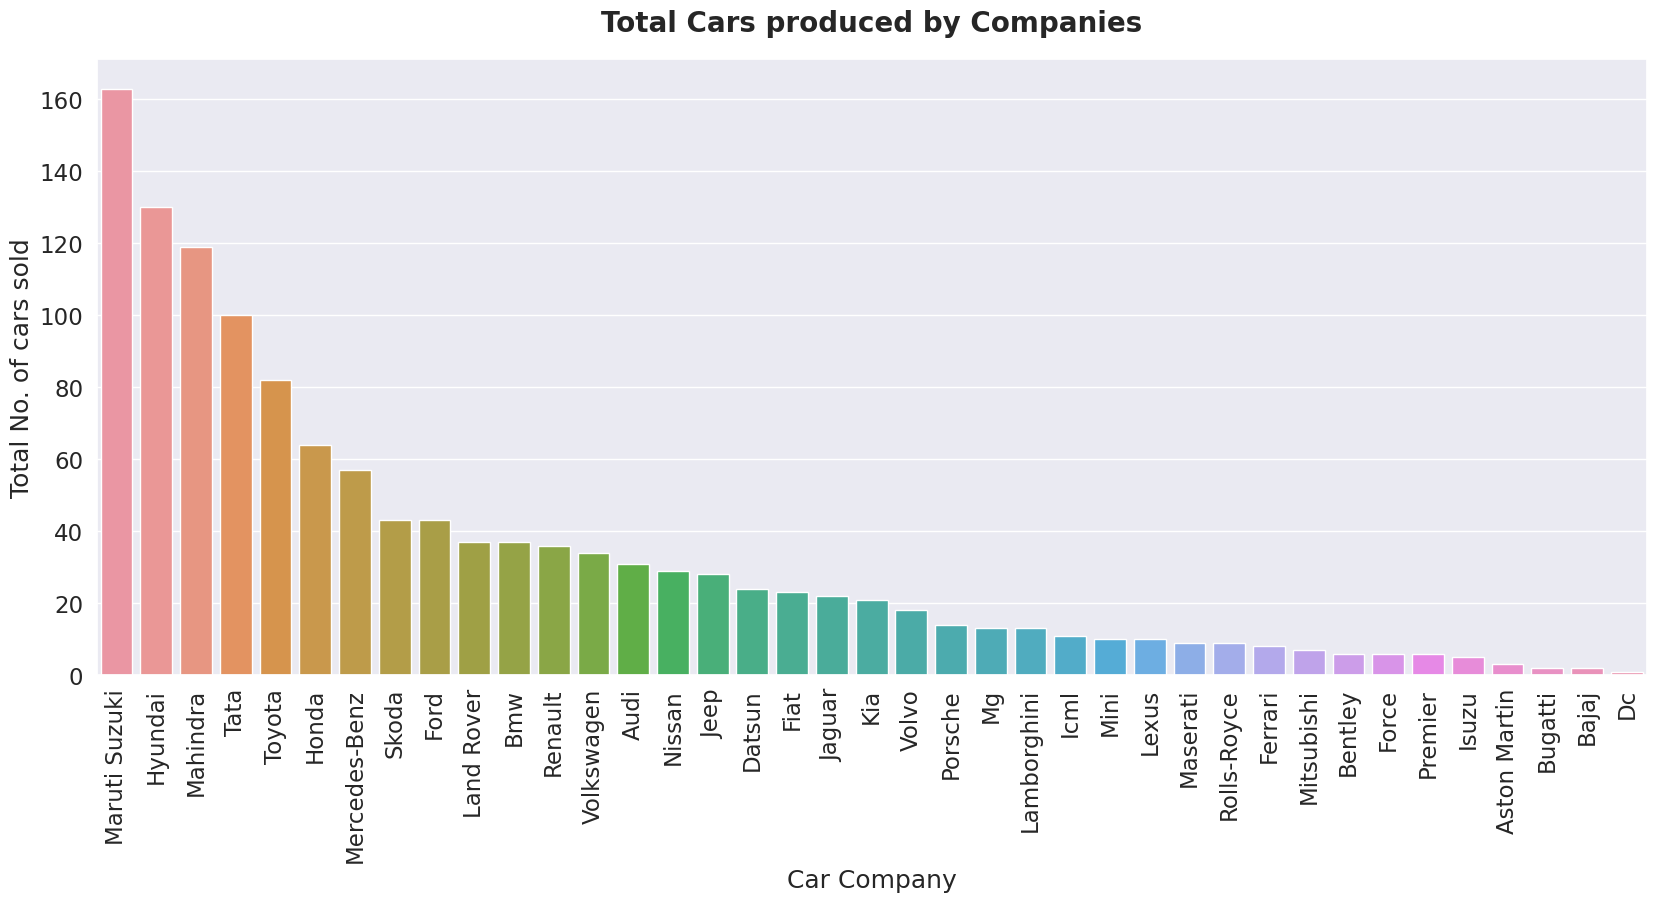

In [251]:
plt.figure(figsize=(20,8))
counts = df["Company"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel("Car Company")
plt.ylabel("Total No. of cars sold")
plt.title("Total Cars produced by Companies", pad=20, fontweight="black", fontsize=20)
plt.xticks(rotation=90)
plt.show()

#### **Insights:**
##### *Maruti suzuki has highest number of cars-->163*
##### *Hyundai has second number of highest cars-->130*
##### *DC & Rolls-Royce Cullinan has less number of cars*





### Car's w.r.t Price (Target)

### Car with the minimum Price & its name, features, and company information

In [252]:
df[df["Price"]==df.Price.min()]

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Company,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
1,2.0,5.0,4.0,4.0,Tata,Nano Genx,Xe,236447.0,624.0,RWD (Rear Wheel Drive),BS IV,not_defined,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,23.6,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined


#### **Insights:**
##### *Cheapest car was Nano of company Tata and having lowest price  236447, with above features details*


 ### cars whose price is greater than average price of the cars in the dat

In [253]:
df_a=df[df["Price"]>=df["Price"].mean()][["Company","Model","Variant","Price"]]
df_a=df_a.sort_values(by=['Price'],ascending=False)

### Number of companies having price greater than average pric

In [254]:
df_a["Company"].nunique()

20

#### **Insights:**
##### *20 companies' cars price is greater than average price.*

### Companies having price greater than average price

In [255]:
df_a["Company"].value_counts()

Mercedes-Benz    42
Land Rover       37
Bmw              31
Audi             21
Jaguar           20
Porsche          14
Lamborghini      13
Lexus            10
Volvo             9
Rolls-Royce       9
Maserati          9
Ferrari           8
Bentley           6
Jeep              5
Aston Martin      3
Bugatti           2
Toyota            2
Nissan            1
Ford              1
Mitsubishi        1
Name: Company, dtype: int64

### car whose price is greater than average price of the cars in the data

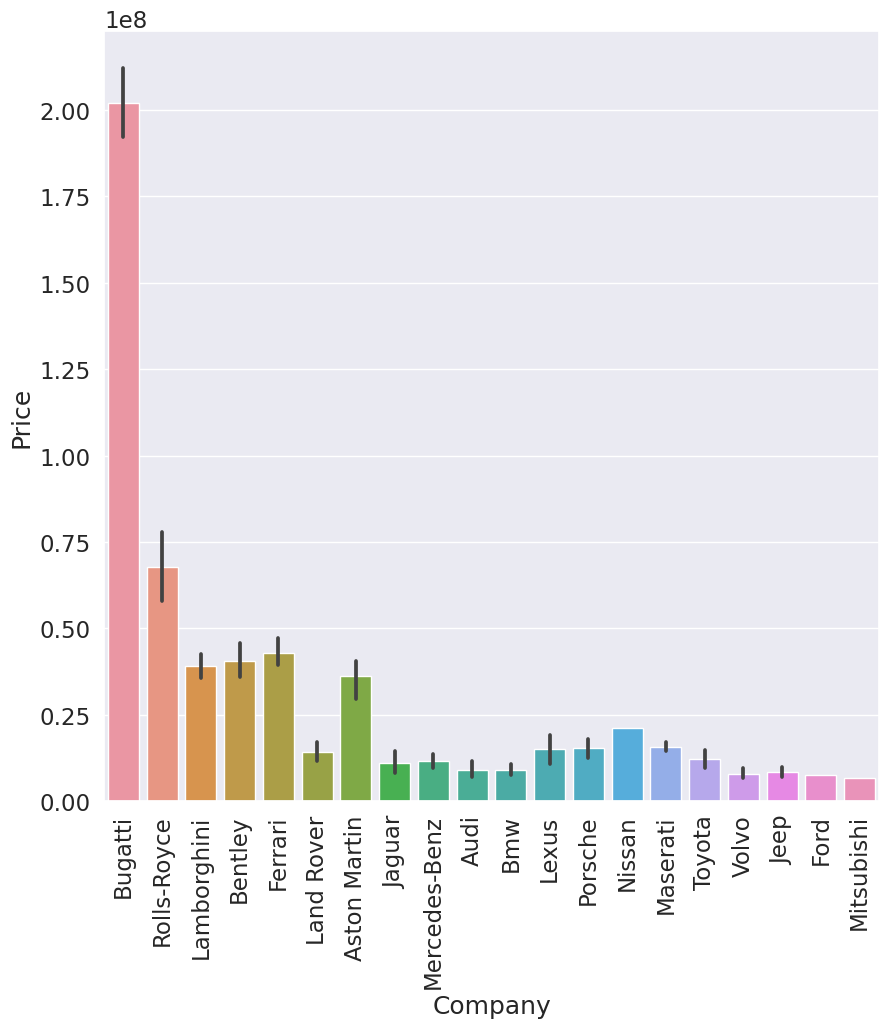

In [256]:
plt.figure(figsize=(10,10))
sns.barplot(x="Company",y="Price",data=df_a)
plt.xticks(rotation=90);

##### **Top 3 Expensive Company's cars average price :**
##### *1- Bugatti*
##### *2- Rolls- Royce*
##### *3- Ferrari*
*Now Find the cause why buggati ,rolls-royce , and Ferrari company's car are expensive what features they have provided so we compare these on the basis of some premium features based on domain knowledge*


##### **Least Expensive company's car :**
##### *Mitsubishi*

#### **Details of above top 3 expensive company's cars**
##### We will consider following premium features in order to differentiate the above top 3 expensive cars with respect to price:
##### Premium feeatures which makes the difference of price in above premium cars(top 3 expensive cars)
***CYLINDER***

***POWER***

***TORQUE***

***TURBOCHARGER***

In [257]:
grp=df.groupby(["Company"])["Cylinders","Turbocharger","Torque","Power"]

In [258]:
grp.get_group("Bugatti")

,Cylinders,Turbocharger,Torque,Power
355,16.0,Yes,1600.0,1479.0
356,16.0,Yes,1479.0,1600.0


In [259]:
grp.get_group("Ferrari").head()

,Cylinders,Turbocharger,Torque,Power
344,8.0,not_defined,755.0,560.0
348,8.0,not_defined,540.0,605.0
872,8.0,not_defined,760.0,670.0
873,8.0,not_defined,760.0,670.0
874,8.0,not_defined,760.0,610.0


In [260]:
grp.get_group("Rolls-Royce")

,Cylinders,Turbocharger,Torque,Power
349,12.0,not_defined,780.0,563.0
350,12.0,not_defined,780.0,570.0
351,12.0,not_defined,800.0,625.0
353,12.0,Yes,850.0,563.0
354,12.0,not_defined,720.0,460.0
879,12.0,Yes,780.0,571.0
880,12.0,Yes,720.0,453.0
1219,12.0,not_defined,720.0,460.0
1220,12.0,not_defined,720.0,460.0


##### **Insight :**
##### *From above output we can see no.of cylinders in buggati is maximum and in rolls royce and ferrari none of the above premium feature clearly differentiate them so based on other features we can say their price is different since ferrari is top brand sport car and Rolls Royce is the epitome of comfort so their type is totally different.*

#### CORRELATION OF FEATURES WITH PRICE

<AxesSubplot:>

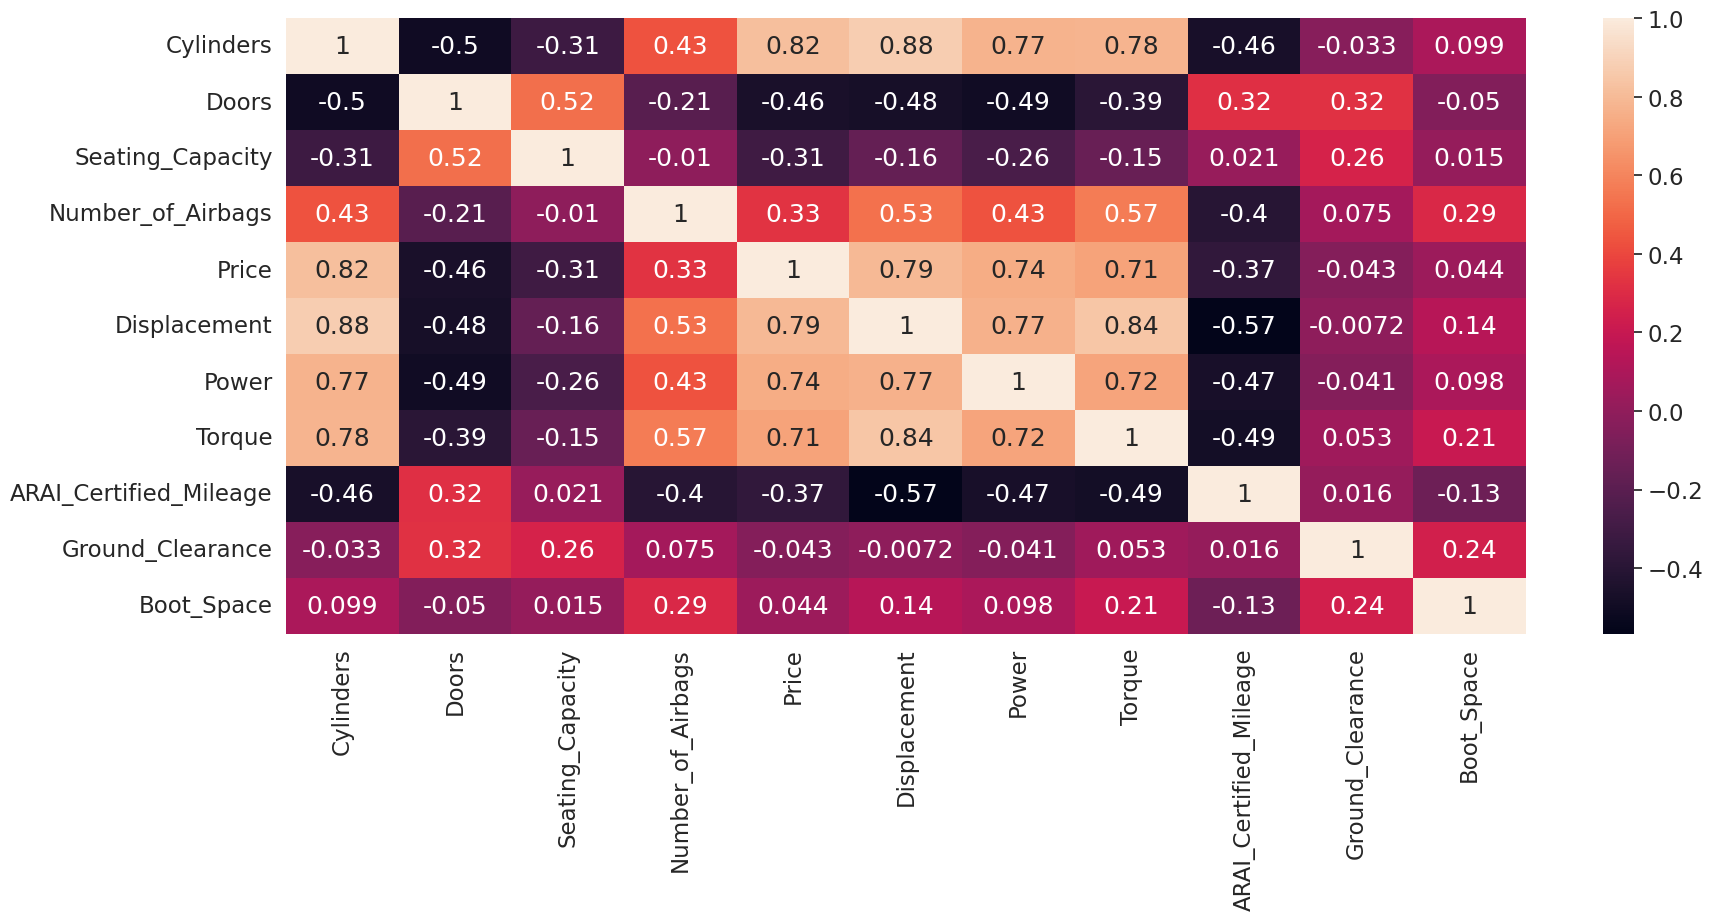

In [261]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True)

##### **Insights:** 
##### *Cylinders,Number_of_Airbags,displacement,power,torque and Boot_Space are positively correlated with respect to price*
##### *Doors, Seating_Capacity ,ARAI_Certified_Mileage and Ground_Clearance are negatively correlated with price*
##### *Cylinders,Displacement,Power and Torque are considered important features with respect to car price*

### A Buyer can make their top three car choices based on the following factors.

***Number_of_Airbags***

***POWER***

***TORQUE***

***TURBOCHARGER***

***Mileage***

***seating_capacity***

***Fuel_Type***

### Companies With Respect To safety

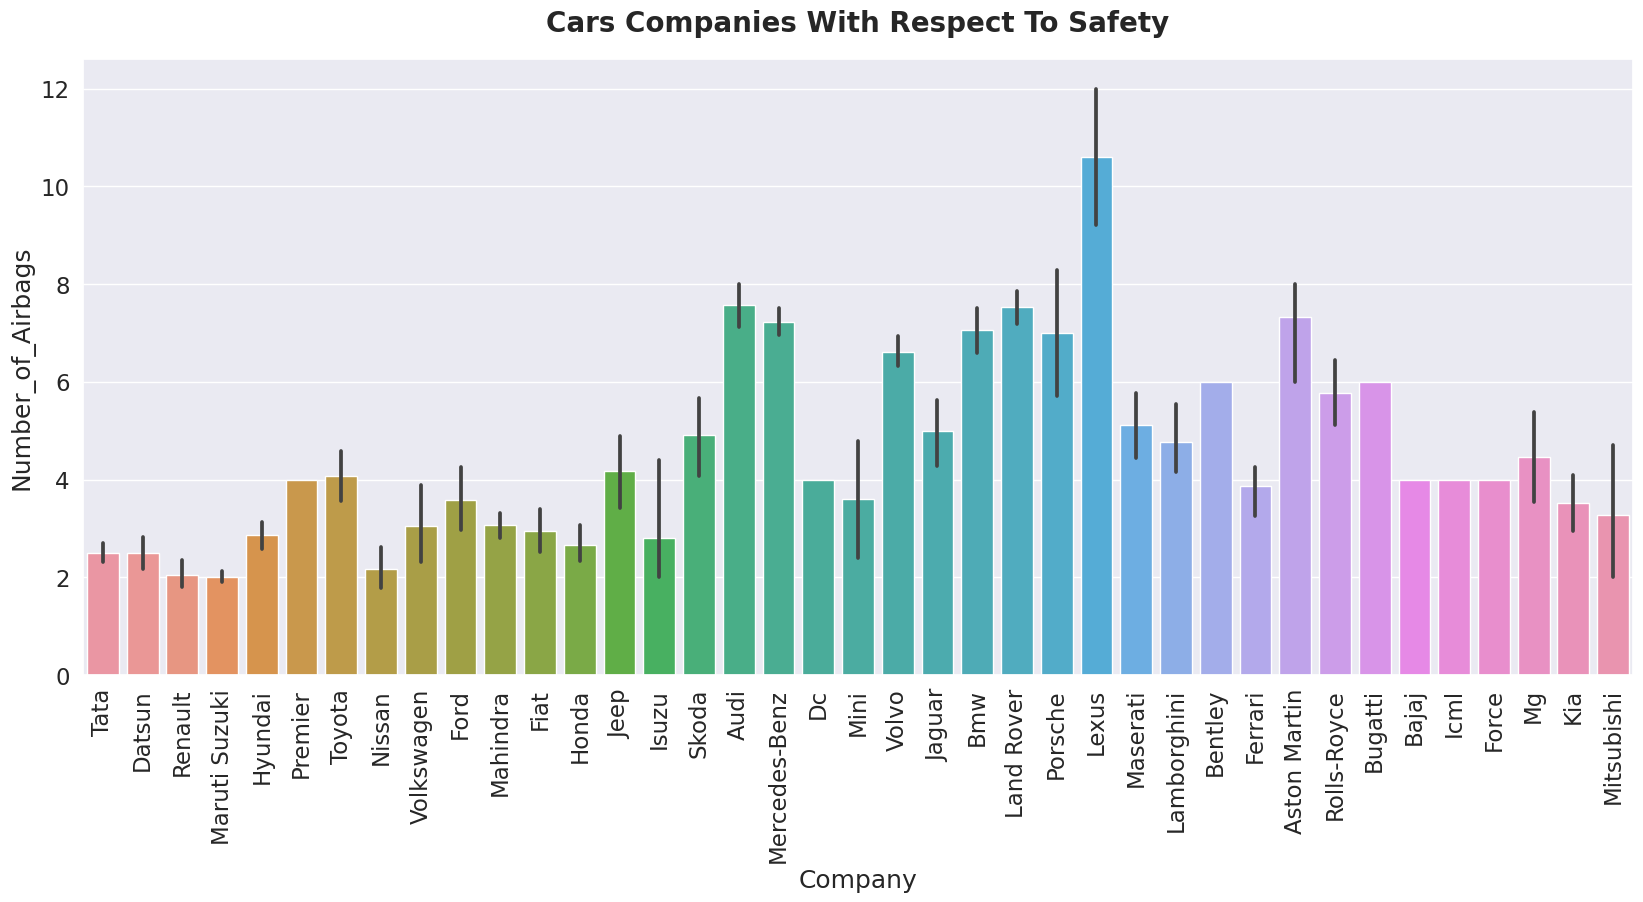

In [262]:
plt.figure(figsize=(20,8))
sns.barplot(x="Company",y="Number_of_Airbags",data=df)
plt.title("Cars Companies With Respect To Safety", pad=20, fontweight="black", fontsize=20)
plt.xticks(rotation=90);


In [263]:
df.groupby(["Company"])["Number_of_Airbags"].agg(["min","max","mean"]).sort_values(by="mean",ascending=False).head(3)

,min,max,mean
Company,,,
Lexus,8.0,14.0,10.600000
Audi,4.0,10.0,7.580645
Land Rover,4.0,10.0,7.540541


#### **Insights :**

**According to safety point of view top 3 companies**

***Lexsus***

***Audi*** 

***Land Rover***

##### *Found to be good company cars which provides average 10.6, 7.58 , 7.48 number of air bags repectively*


### Companies With Respect To Power


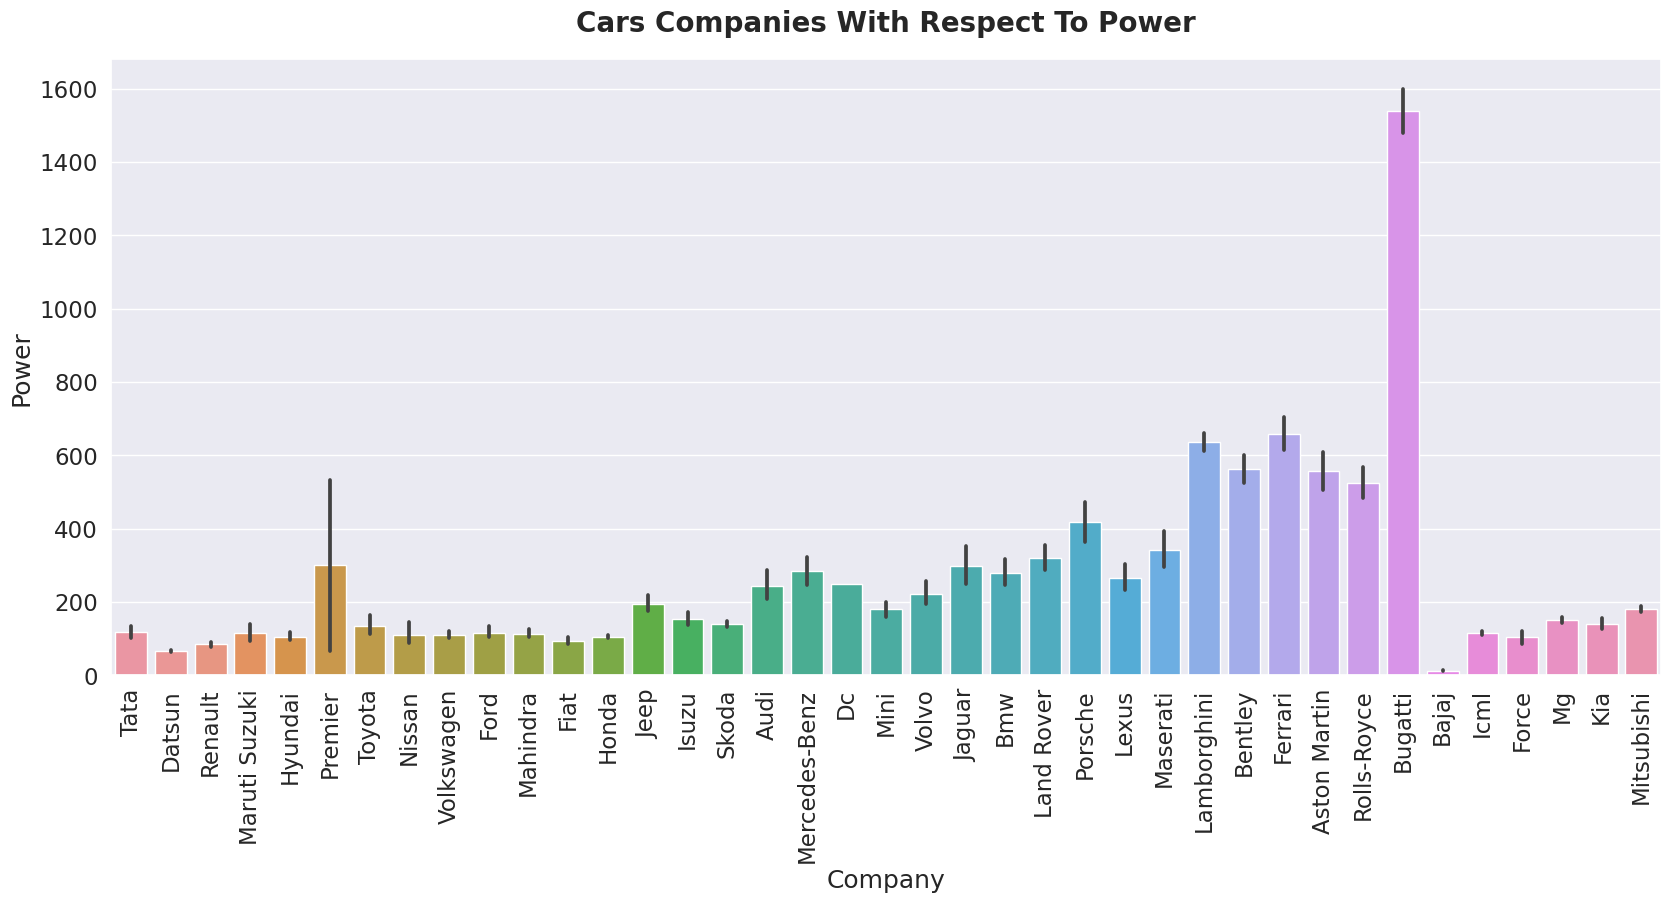

In [264]:
plt.figure(figsize=(20,8))
sns.barplot(x="Company",y="Power",data=df)
plt.title("Cars Companies With Respect To Power", pad=20, fontweight="black", fontsize=20)
plt.xticks(rotation=90);


In [265]:
df.groupby(["Company"])["Power"].agg(["min","max","mean"]).sort_values(by="mean",ascending=False).head(3)

,min,max,mean
Company,,,
Bugatti,1479.0,1600.0,1539.500000
Ferrari,560.0,789.0,656.750000
Lamborghini,571.0,740.0,636.461538


#### **Insights :**

**According to Power point of view top 3 companies**

***Bugatti***

***Ferrari*** 

***Lamborghini***

##### *Found to be good company cars which provides average power 1539.5, 656.75, 636.46 , 563.83 repectively.*


### Companies With Respect To Torque


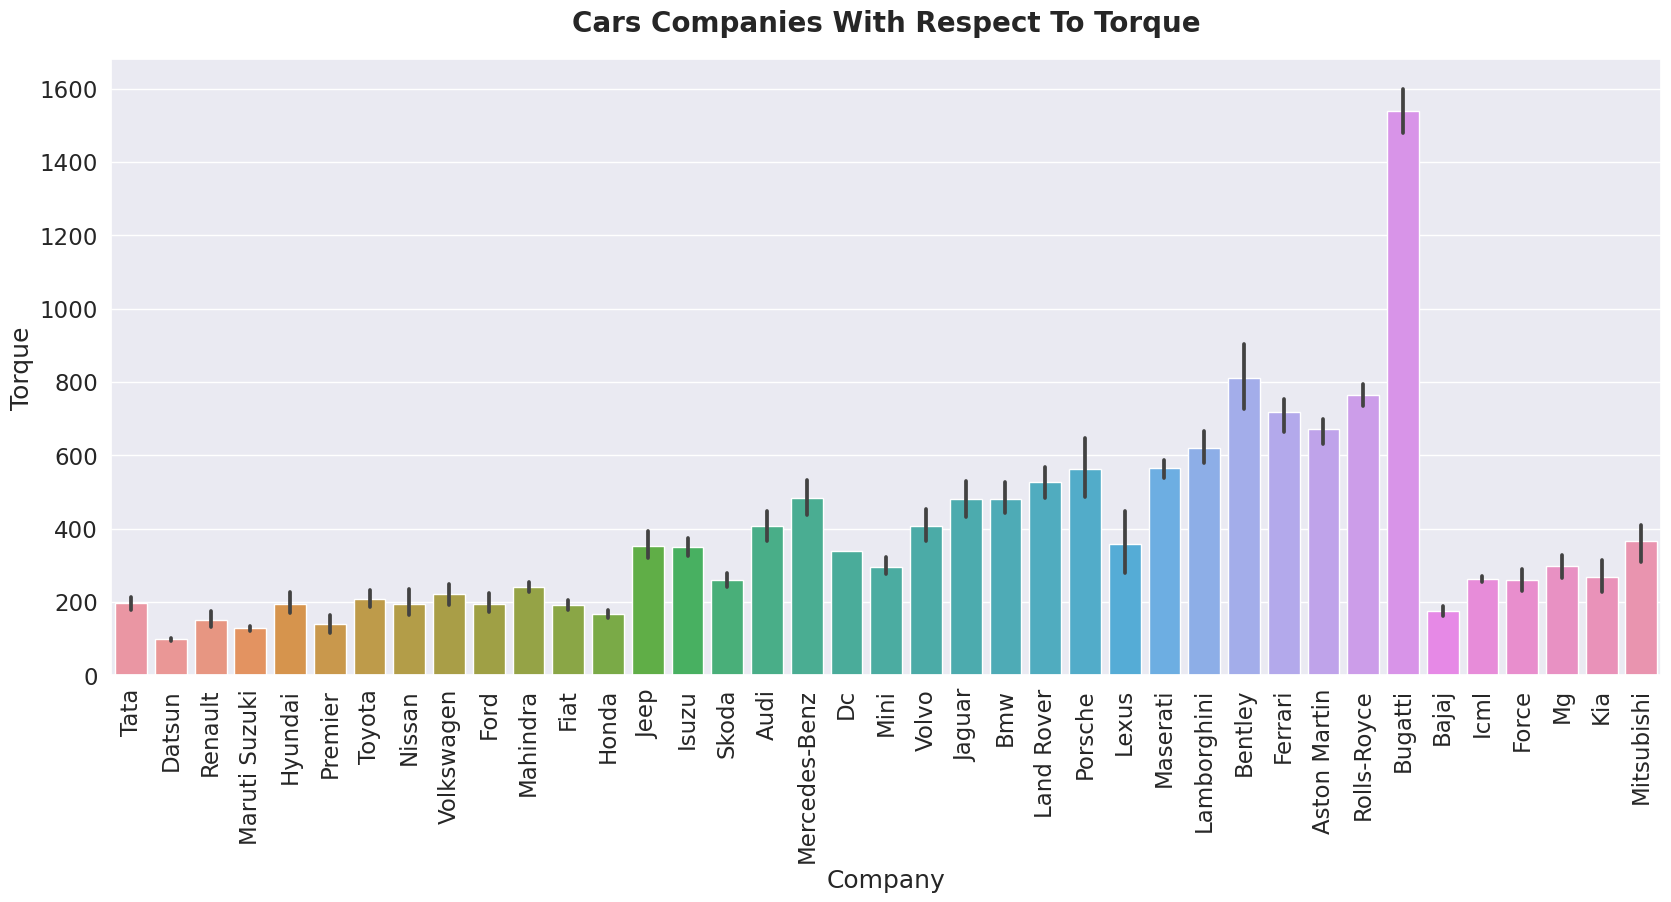

In [266]:
plt.figure(figsize=(20,8))
sns.barplot(x="Company",y="Torque",data=df)
plt.title("Cars Companies With Respect To Torque", pad=20, fontweight="black", fontsize=20)
plt.xticks(rotation=90);

In [267]:
df.groupby(["Company"])["Torque"].agg(["min","max","mean"]).sort_values(by="mean",ascending=False).head(3)

,min,max,mean
Company,,,
Bugatti,1479.0,1600.0,1539.500000
Bentley,660.0,1020.0,811.666667
Rolls-Royce,720.0,850.0,763.333333


#### **Insights :**

**According to Torque point of view top 3 companies**

***Bugatti***

***Bentley*** 

***Rolls-Royce***

##### *Found to be good company cars which provides average torque 1539.5, 811.6, 763.33, 718.75 repectively*


### Companies With Respect To Seating Capacity

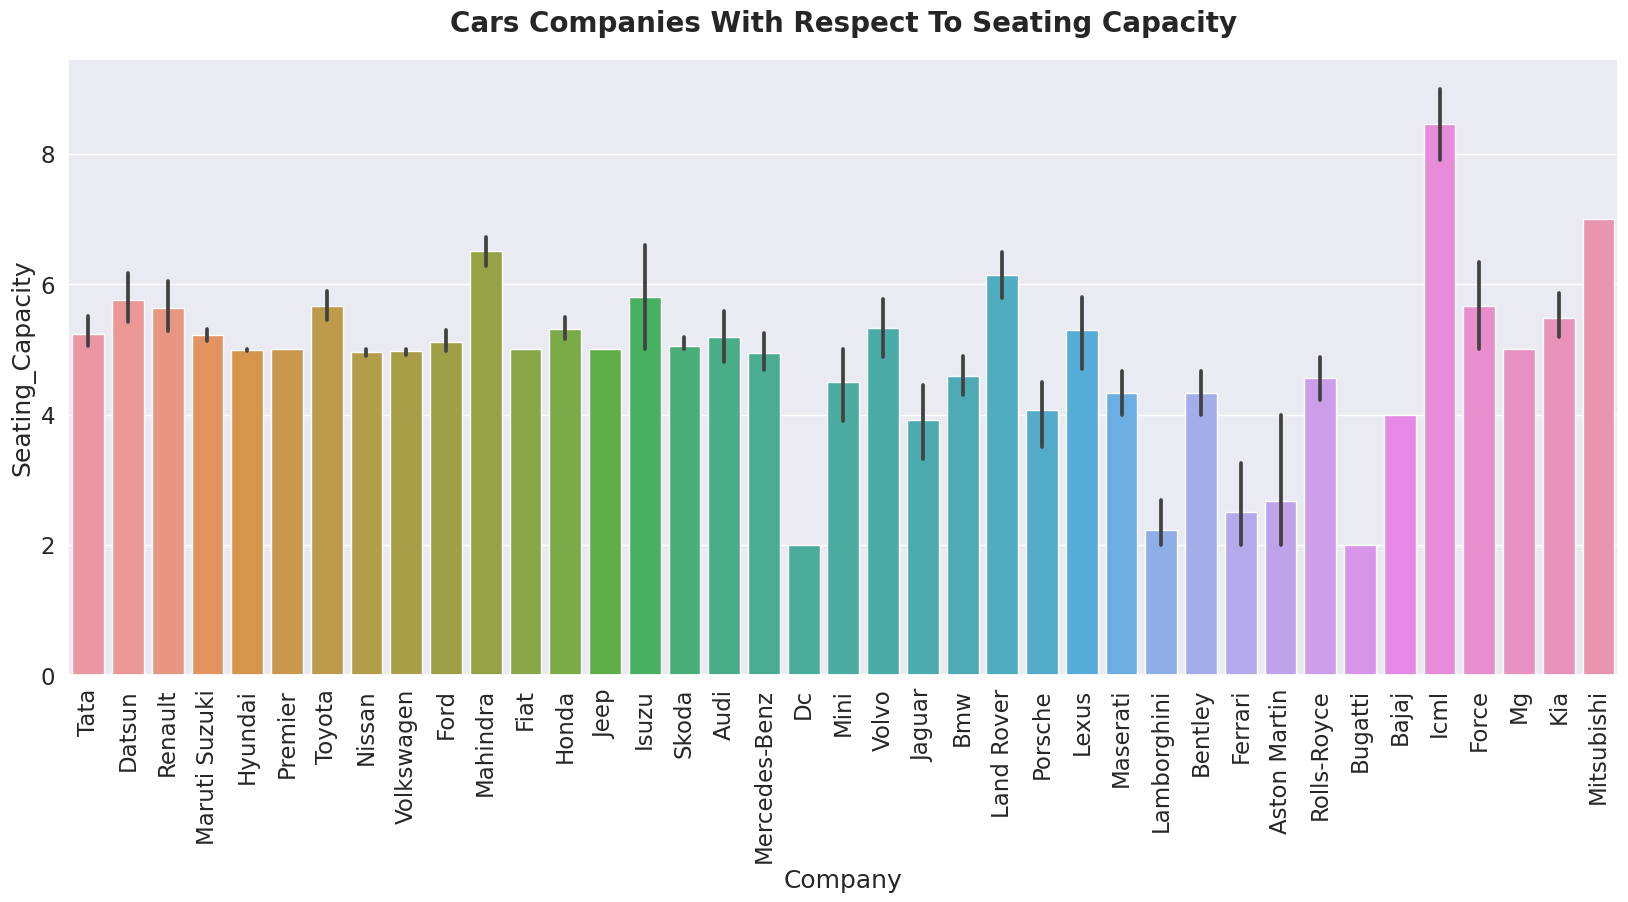

In [268]:
plt.figure(figsize=(20,8))
sns.barplot(x="Company",y="Seating_Capacity",data=df)
plt.title("Cars Companies With Respect To Seating Capacity", pad=20, fontweight="black", fontsize=20)
plt.xticks(rotation=90);

In [269]:
df.groupby(["Company"])["Seating_Capacity"].agg(["min","max","mean"]).sort_values(by="mean",ascending=False).head(3)

,min,max,mean
Company,,,
Icml,7.0,9.0,8.454545
Mitsubishi,7.0,7.0,7.000000
Mahindra,4.0,9.0,6.504202


#### **Insights :**

**According to Seating Capacity point of view top 3 companies**

***Icml : 8 seater***

***Mitsubishi : 7 seater*** 

***Mahindra : 6 seater***



### Companies With Respect To Mileage

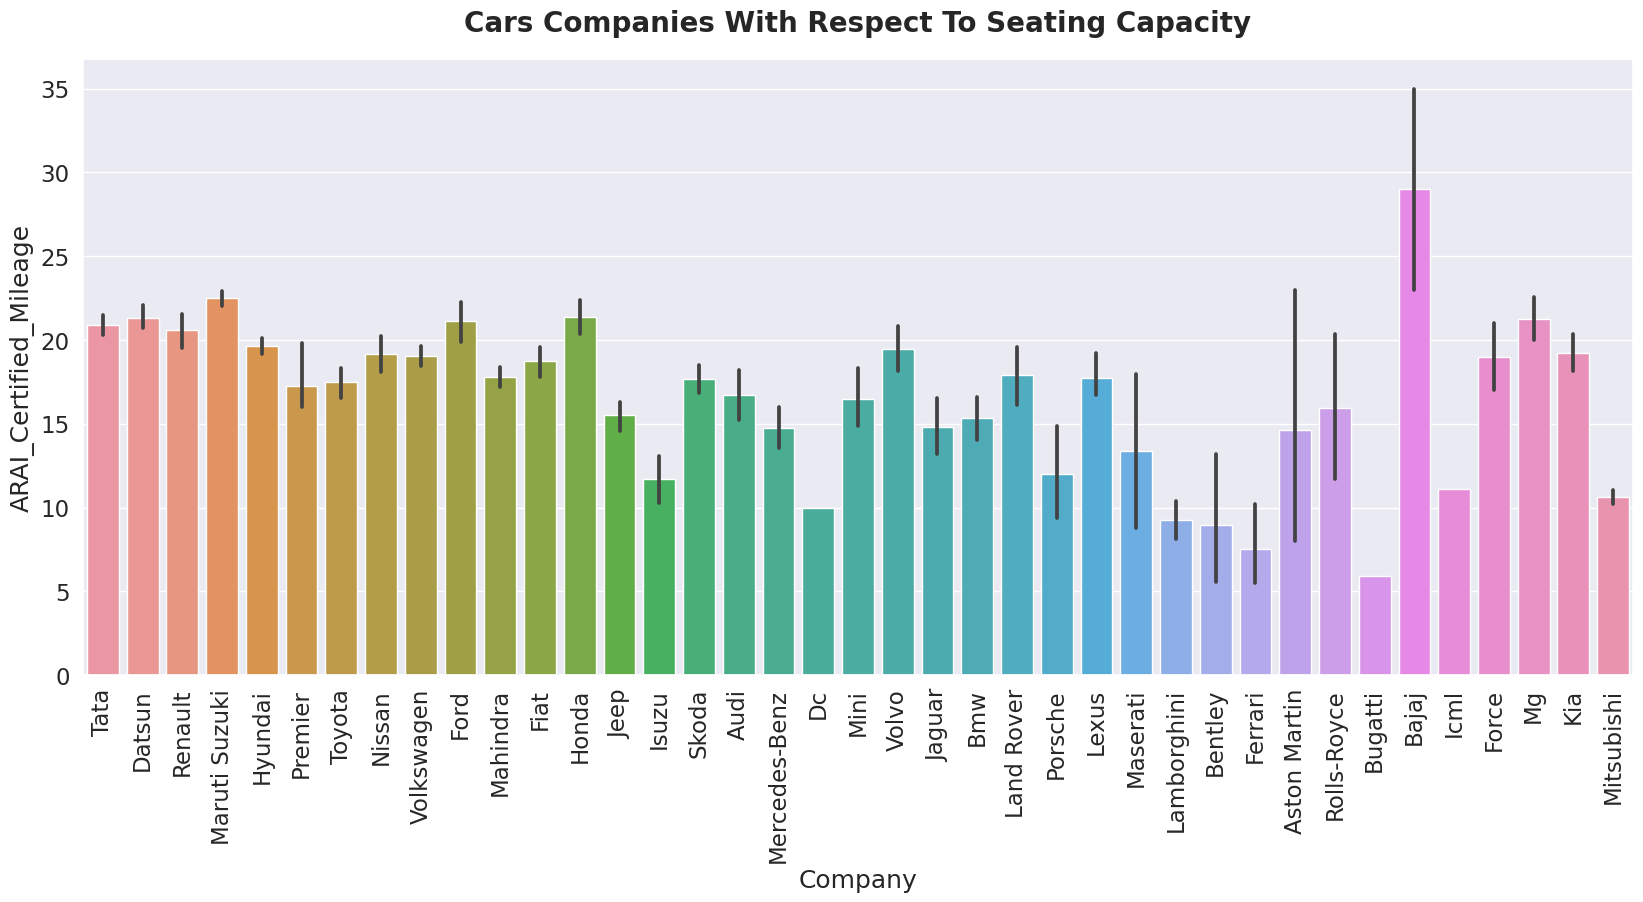

In [270]:
plt.figure(figsize=(20,8))
sns.barplot(x="Company",y="ARAI_Certified_Mileage",data=df)
plt.title("Cars Companies With Respect To Seating Capacity", pad=20, fontweight="black", fontsize=20)
plt.xticks(rotation=90);

In [271]:
df.groupby(["Company"])["ARAI_Certified_Mileage"].agg(["min","max","mean"]).sort_values(by="mean",ascending=False).head(3)

,min,max,mean
Company,,,
Bajaj,23.0,35.0,29.000000
Maruti Suzuki,11.9,28.4,22.511043
Honda,14.4,27.4,21.362500


#### **Insights :**

**According to Torque point of view top 3 companies**

***Bajaj***

***Maruti Suzuki*** 

***Honda***

##### *Found to be good company cars which provides average ARAI_Certified_Mileage 29, 22.5 , 21.3 repectively*


### Fuel Distribution

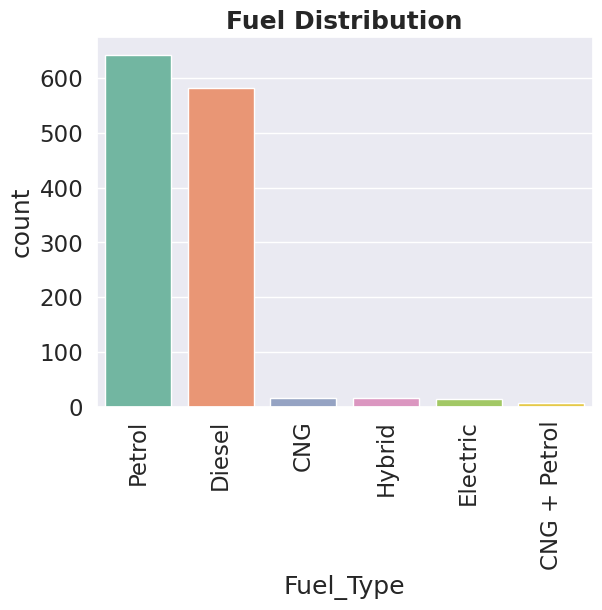

In [272]:
sns.countplot(x="Fuel_Type",data=df,palette="Set2",order=df["Fuel_Type"].value_counts().index)
plt.title("Fuel Distribution",pad=6,fontweight="black",fontsize=18)
plt.xticks(rotation=90);


#### **Insights :**

***Customers preferred Petrol fuel_type.***


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
🚀Data Preprocessiong
</p>
</div>


#### Dropping irrelevant features from ML POV

### List of all the useful Features 




In [273]:
df.drop(columns=["Company","Tachometer","Tripmeter","Front_Suspension","Rear_Suspension","Audiosystem","Third_Row_AC_Vents","Ventilation_System","Key_Off_Reminder","Cooled_Glove_Box","Gear_Shift_Reminder","Rain_Sensing_Wipers","Seat_Height_Adjustment","Adjustable_Steering_Column","Rear_Center_Armrest"],inplace=True)

#### Rechecking shape after deleting irrelevant features

In [274]:
df.shape

(1276, 34)

## Encoding

### Label encoding

#### Label Encoding on those Features which contain Yes/NO values

In [275]:
l = ['Navigation_System', 'Second_Row_AC_Vents',
       'ESP_(Electronic_Stability_Program)',
       'Turbocharger','Automatic_Headlamps',
       'Cruise_Control','EBA_(Electronic_Brake_Assist)',
       'EBD_(Electronic_Brake-force_Distribution)',
       'ABS_(Anti-lock_Braking_System)','Gear_Indicator',
       'Auto-Dimming_Rear-View_Mirror', 'Hill_Assist',
       'USB_Compatibility',"ASR_/_Traction_Control"]
for i in l:
    df[i].replace({"Yes":1,"not_defined":0},inplace=True)

##### *As you can see above all the yes and undefined values are replaced with numeric 0 and 1*

### Replacing all data values of these  features with numeric values like 0,1,2,3,4,5
#### *Drivetrain*
#### *Emission_Norm*
#### *Keyless_Entry*
#### *Odometer*
#### *Speedometer*
#### *Fuel_Type*
#### *Parking_Assistance*

#### Steps 
##### *Check unique values* 
##### *Replace all the values with numeric values*
##### *Recheck unique values to see all values have been changed or not* 

### ***Drivetrain***

In [276]:
df["Drivetrain"].unique()

array(['RWD (Rear Wheel Drive)', 'FWD (Front Wheel Drive)',
       'AWD (All Wheel Drive)', '4WD'], dtype=object)

In [277]:
df["Drivetrain"]=df["Drivetrain"].replace({"RWD (Rear Wheel Drive)":0,"FWD (Front Wheel Drive)":1,"AWD (All Wheel Drive)":2,"4WD":3})

In [278]:
df["Drivetrain"].unique()

array([0, 1, 2, 3])

### ***Emission_Norm***

In [279]:
df["Emission_Norm"].unique()

array(['BS IV', 'BS 6', 'BS III', 'BS VI'], dtype=object)

In [280]:
df["Emission_Norm"]=df["Emission_Norm"].replace("BS 6","BS VI")
df["Emission_Norm"]=df["Emission_Norm"].replace({'BS III':0,'BS IV':1, 'BS VI':2})

In [281]:
df["Emission_Norm"].unique()

array([1, 2, 0])

### ***Keyless_Entry***

In [282]:
df["Keyless_Entry"].unique()

array(['Remote', 'not_defined', 'Yes', 'Smart Key', 'Smart Key, Remote'],
      dtype=object)

In [283]:
df["Keyless_Entry"]=df["Keyless_Entry"].replace({'not_defined':0,'Remote':1, 'Yes':2, 'Smart Key':3,'Smart Key, Remote':4})

In [284]:
df["Keyless_Entry"].unique()

array([1, 0, 2, 3, 4])

### ***Odometer***

In [285]:
df["Odometer"].unique()

array(['Digital', 'Analog', 'not_defined', 'Digital, Analog', 'Yes'],
      dtype=object)

In [286]:
df["Odometer"]=df["Odometer"].replace({'not_defined':0,'Digital':1, 'Analog':2, 'Digital, Analog':3, 'Yes':4})


In [287]:
df["Odometer"].unique()

array([1, 2, 0, 3, 4])

### ***Speedometer***

In [288]:
df["Speedometer"].unique()

array(['Analog', 'Digital', 'Analog, Digital', 'not_defined', 'Yes'],
      dtype=object)

In [289]:
df["Speedometer"]=df["Speedometer"].replace({'Analog':0, 'Digital':1, 'Analog, Digital':2,'not_defined':3, 'Yes':4})

In [290]:
df["Speedometer"].unique()

array([0, 1, 2, 3, 4])

### ***Fuel_Type***

In [291]:
df["Fuel_Type"].unique()

array(['Petrol', 'CNG', 'Diesel', 'CNG + Petrol', 'Hybrid', 'Electric'],
      dtype=object)

In [292]:
df["Fuel_Type"]=df["Fuel_Type"].replace({"Petrol":0,"CNG":1,"Diesel":2,"CNG + Petrol":3,"Hybrid":4,"Electric":5})

In [293]:
df["Fuel_Type"].unique()

array([0, 1, 2, 3, 4, 5])

### ***Parking_Assistance***

In [294]:
df["Parking_Assistance"].unique()

array(['not_defined', 'Rear sensors', 'Rear sensors with camera',
       'Front and rear sensors with camera', 'Yes',
       'Front & rear sensors with 360 degree view',
       'Rear sensors, Front sensors'], dtype=object)

In [295]:
df["Parking_Assistance"]=df["Parking_Assistance"].replace({'not_defined':0, 'Rear sensors':1, 'Rear sensors with camera':2,'Front and rear sensors with camera':3,'Yes':4, 'Front & rear sensors with 360 degree view':5,'Rear sensors, Front sensors':6})

In [296]:
df["Parking_Assistance"].unique()

array([0, 1, 2, 3, 4, 5, 6])

### We will apply Mean Target Encoding on Model and Variant
#### *In this Catgories are replaced by its targets mean*


### ***Model***

#### Storing Price mean w.r.t Model

In [297]:
df2=df.groupby(["Model"])["Price"].agg(["mean"]).reset_index()

In [298]:
l=[]
for i in df["Model"]:
    for j,k in df2.iterrows():
        if i==k["Model"]:
            l.append(k["mean"])

### ***Variant***

#### Storing Price mean w.r.t Variant

In [299]:
df2=df.groupby(["Variant"])["Price"].agg(["mean"]).reset_index()

In [300]:
l2=[]
for i in df["Variant"]:
    for j,k in df2.iterrows():
        if i==k["Variant"]:
            l2.append(k["mean"])

### Loading the stored data of l and l2 into datadet df

In [301]:
df["Model"]=l
df["Variant"]=l2

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
🚀Model Building
</p>
</div>

### Checking Shape of the Dataset

In [302]:
df.shape

(1276, 34)

##### *As we can say that now  there are 1276 rows/records and 34  columns/Features present in our dataset for Data Modeling*

### Checking that all the columns are of numeric type

In [303]:
Dtype=df.dtypes
Dtype.to_frame().rename(columns={0:"Data Type"})

,Data Type
Cylinders,float64
Doors,float64
Seating_Capacity,float64
Number_of_Airbags,float64
Model,float64
Variant,float64
Price,float64
Displacement,float64
Drivetrain,int64
Emission_Norm,int64


##### *As we can see that our all feature are of numeric type so now we can do Model Evolution*

### Seggregate Features and Target

In [304]:
Features=df.drop(columns=["Price"])
Target=df["Price"]

### Checking the Shape of Features

In [305]:
Features.shape

(1276, 33)

### Checking the Shape of Target

In [306]:
Target.shape

(1276,)

### Storing Features in x & Target in y

In [307]:
x=Features
y=Target

### Scaling(Standard Scaler), required for linear and KNN

In [308]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

### Bcz of Mean Target Encoding ,it create chances of overfitting that's why we are using cross validation¶


In [309]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

##### *Mean Target encoding,and its drawback is Data Leakage(Overfitting) and for overfitting we used cross validation*

### Splitting Data for Model Traning & Testing

In [310]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=30)

In [311]:
print("x_train ---->  ",x_train.shape)
print("x_test ----->  ",x_test.shape)
print("y_train ----->  ",y_train.shape)
print("y_test ------>  ",y_test.shape)

x_train ---->   (1020, 33)
x_test ----->   (256, 33)
y_train ----->   (1020,)
y_test ------>   (256,)


In [312]:
training_score = []
testing_score = []

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
🚀Model Evaluation
</p>
</div>

In [313]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = r2_score(y_train,x_train_pred)*100
    b = r2_score(y_test,x_test_pred)*100
    training_score.append(a)
    testing_score.append(b)
    
    print(f"r2_Score of {model} model on Training Data is:",a)
    print(f"r2_Score of {model} model on Testing Data is:",b)

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>1. Linear-Regression </b> Model</h2>

In [314]:
model_prediction(LinearRegression())

r2_Score of LinearRegression() model on Training Data is: 98.98637470818504
r2_Score of LinearRegression() model on Testing Data is: 98.48826685421639


<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>2. Decision-Tree-Regressor </b> Model</h2>

In [315]:
model_prediction(DecisionTreeRegressor())

r2_Score of DecisionTreeRegressor() model on Training Data is: 100.0
r2_Score of DecisionTreeRegressor() model on Testing Data is: 96.66501698926194


<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>3. Random-Forest-Regressor </b> Model</h2>

In [316]:
model_prediction(RandomForestRegressor())

r2_Score of RandomForestRegressor() model on Training Data is: 98.92725115830726
r2_Score of RandomForestRegressor() model on Testing Data is: 98.08533513821838


<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>5. Ada-Boost-Regressor </b> Model</h2>

In [317]:
model_prediction(AdaBoostRegressor())

r2_Score of AdaBoostRegressor() model on Training Data is: 98.18856179272032
r2_Score of AdaBoostRegressor() model on Testing Data is: 95.3044124013758


<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>5. Gradient-Boosting-Regressor </b> Model</h2>

In [318]:
model_prediction(GradientBoostingRegressor())


r2_Score of GradientBoostingRegressor() model on Training Data is: 99.9345061491307
r2_Score of GradientBoostingRegressor() model on Testing Data is: 98.44135802852595


<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>6. LGMB Regressor </b> Model</h2>

In [319]:
c=model_prediction(LGBMRegressor())

r2_Score of LGBMRegressor() model on Training Data is: 86.06323548416965
r2_Score of LGBMRegressor() model on Testing Data is: 87.85614494978314


<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>7. XGBRegressor </b> Model</h2>

In [320]:
model_prediction(XGBRegressor())

r2_Score of XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...) model on Training Data is: 99.99979514218107
r2_Score of XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>8. Cat-Boost-Regressor </b> Model</h2>

In [321]:
model_prediction(CatBoostRegressor(verbose=False))

r2_Score of <catboost.core.CatBoostRegressor object at 0x7939d27b61d0> model on Training Data is: 99.87264895478816
r2_Score of <catboost.core.CatBoostRegressor object at 0x7939d27b61d0> model on Testing Data is: 96.23298915314837


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
🚀All Model Performance Comparison
</p>
</div>

In [322]:
models = ["Linear Regression","Decision Tree","Random Forest","Ada Boost","Gradient Boost","LGBM","XGBoost","CatBoost"]

In [323]:
df = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score})

In [324]:
df

,Algorithms,Training Score,Testing Score
0,Linear Regression,98.986375,98.488267
1,Decision Tree,100.000000,96.665017
2,Random Forest,98.927251,98.085335
3,Ada Boost,98.188562,95.304412
4,Gradient Boost,99.934506,98.441358
5,LGBM,86.063235,87.856145
6,XGBoost,99.999795,98.495702
7,CatBoost,99.872649,96.232989


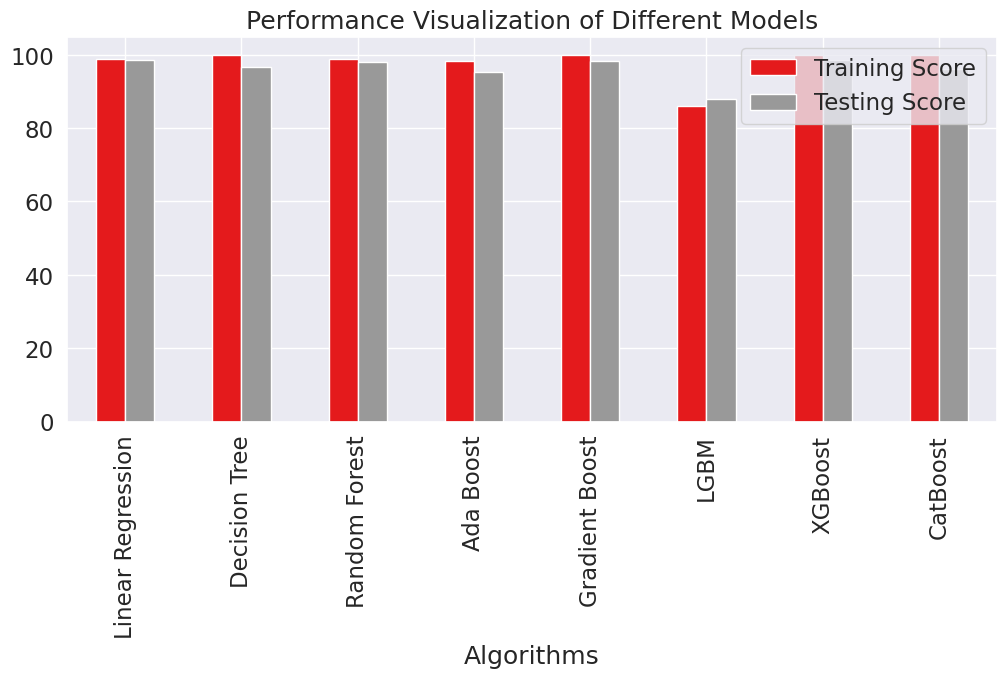

In [325]:
df.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(12,5),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set1")
plt.show()



<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
🚀Conclusion
</p>
</div>



#### 💡 First we did the <b>Basic Understanding of Data</b><br>
#### 💡 Then we performed <b>Data Cleaning</b> to make the raw data more useable while analysis.<br>
#### 💡 Then we performed <b>Exploratory Data Analysis</b> to generate insights from the data.<br>
#### 💡 Then we performed <b>Data Preprocessing</b> to make data suitable for model training & testing.<br>
#### 💡 Then we trainined our model using different Machine Learning Algorithms.<br>
#### 💡 In the end we came with <b>98.49% accuracy</b> which was given by <b>XGBoost</b>.So we can use this model for predicting price of a car in future.<br>
